In [1]:
import os
os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 

In [2]:
import pandas as pd
from pl_temp_fit import test_FIT_NEW
num_samples = [5000]
num_tune = [1000]
sigma = [0.02]

temperature_list = [
    [300.0, 250.0, 200.0, 150.0, 80.0],
    [300.0, 150.0, 80.0],
    [300.0],
]
number_free_parameters = [2, 5]
Temp_std_err_list = [2,10,0.1]
hws_std_err_list = [0.002,0.01,0.005]
relative_intensity_std_error_list = [0.05,0.01]

parameter_list = test_FIT_NEW.generate_parameter_list(
    num_samples, num_tune, sigma, temperature_list, number_free_parameters,
    Temp_std_err_list, hws_std_err_list, relative_intensity_std_error_list)

df = pd.DataFrame(parameter_list)
df

Running on PyMC v5.10.3


,num_samples,num_tune,sigma,temperature_list,number_free_parameters,Temp_std_err,hws_std_err,relative_intensity_std_error
0,5000,1000,0.02,"[300.0, 250.0, 200.0, 150.0, 80.0]",2,2.0,0.002,0.05
1,5000,1000,0.02,"[300.0, 250.0, 200.0, 150.0, 80.0]",2,2.0,0.002,0.01
2,5000,1000,0.02,"[300.0, 250.0, 200.0, 150.0, 80.0]",2,2.0,0.010,0.05
3,5000,1000,0.02,"[300.0, 250.0, 200.0, 150.0, 80.0]",2,2.0,0.010,0.01
4,5000,1000,0.02,"[300.0, 250.0, 200.0, 150.0, 80.0]",2,2.0,0.005,0.05
...,...,...,...,...,...,...,...,...
103,5000,1000,0.02,[300.0],5,0.1,0.002,0.01
104,5000,1000,0.02,[300.0],5,0.1,0.010,0.05
105,5000,1000,0.02,[300.0],5,0.1,0.010,0.01
106,5000,1000,0.02,[300.0],5,0.1,0.005,0.05


In [3]:
import glob
import arviz
from pl_temp_fit import PLPYMCModel
import importlib
importlib.reload(PLPYMCModel)

<module 'pl_temp_fit.PLPYMCModel' from '/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/PLPYMCModel.py'>

In [4]:
# load results from exp_results folder

E_true = 1.5
sigma_true = 0.02
LI_true = 0.09
L0_true = 0.1
H0_true = 0.15
true_parameters = [E_true, sigma_true, LI_true, L0_true, H0_true]
model = PLPYMCModel.PLPYMCModel()
folder = glob.glob('test_results_05_01/*')
exp_data_dict = {}
model_dict = {}
for f in folder:
    name = f.split('/')[-1]
    if 'idata.nc' in os.listdir(f):
        exp_results = arviz.from_netcdf(f'{f}/idata.nc')
        exp_data_dict[name] = exp_results
    if 'model.nc' in os.listdir(f):
        model_2 = model.load(f'{f}/model.nc')
        model_dict[name] = model_2

In [5]:
from pl_temp_fit import test_FIT_NEW
import numpy as np  
# generate the data
temperature_list = [300.0, 250.0, 200.0, 150.0, 80.0]
hws = np.arange(0.8, 2, 0.02)


In [6]:
for name,model in model_dict.items():
    #if int(name.split('number_free_parameters=')[1][0]) ==5 and int(name.split('temperature_list=')[1][0]) == 5:
        df_summary = arviz.summary(model.idata)
        print(name, df_summary['r_hat'].values.max())
        if df_summary['r_hat'].values.max() < 2.2:
            #print(name, df_summary['r_hat'].values.max())
            print(df_summary)
            print('------------------')
            print('------------------')
            fig = model.plot_trace(true_parameters, save_folder="", savefig=False)
            fig.suptitle(name)
            fig.show()
            
            model_config = model.model_config.copy()

            entries_to_remove = ('E', 'LI', 'L0', 'H0', 'sigma_E')
            for k in entries_to_remove:
                model_config.pop(k, None)
            truemodel_pl, true_parameters = test_FIT_NEW.generate_data(temperature_list, hws, **model_config)

            test_FIT_NEW.plot_generated_data(truemodel_pl, temperature_list, hws, "", savefig=False, model_config=model_config)
            model.plot_posterior_prediction(truemodel_pl,  temperature_list, hws, save_folder="", savefig=False)

            
            

        


num_samples=20000 num_tune=2000 sigma=0.03 temperature_list=3 number_free_parameters=5 Temp_std_err=2 hws_std_err=0.005 relative_intensity_std_error=0.01 2.02
num_samples=20000 num_tune=2000 sigma=0.03 temperature_list=3 number_free_parameters=5 Temp_std_err=2 hws_std_err=0.005 relative_intensity_std_error=0.01 2.02
          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
E        1.606  0.064   1.451    1.674      0.024    0.017      11.0   
sigma_E  0.025  0.010   0.001    0.030      0.003    0.003       7.0   
LI       0.057  0.020   0.050    0.109      0.006    0.004       5.0   
L0       0.184  0.043   0.050    0.200      0.017    0.013       6.0   
H0       0.185  0.021   0.136    0.200      0.007    0.005       8.0   

         ess_tail  r_hat  
E            12.0   1.29  
sigma_E      16.0   1.59  
LI            6.0   2.02  
L0            9.0   1.70  
H0           18.0   1.42  
------------------
------------------


In [11]:
truemodel_pl

array([[ 2.59052553e+22,  2.60316860e+22,  2.51837477e+22,
         2.39646332e+22,  1.72531839e+22],
       [ 3.81478218e+22,  3.85017310e+22,  3.72256880e+22,
         3.52237541e+22,  3.54611075e+22],
       [ 5.48869487e+22,  5.63265552e+22,  5.61169836e+22,
         5.63277657e+22,  7.70564856e+22],
       [ 7.60960922e+22,  7.93985365e+22,  8.18142780e+22,
         8.73577335e+22,  1.31061752e+23],
       [ 1.05793845e+23,  1.11353905e+23,  1.17077998e+23,
         1.29215401e+23,  1.78082584e+23],
       [ 1.36990776e+23,  1.43722295e+23,  1.50507910e+23,
         1.64516884e+23,  1.87306726e+23],
       [ 1.75509631e+23,  1.82150349e+23,  1.86715393e+23,
         1.95805059e+23,  1.70685174e+23],
       [ 2.38500931e+23,  2.43840580e+23,  2.41289049e+23,
         2.35552309e+23,  1.61481870e+23],
       [ 2.91596989e+23,  2.96782919e+23,  2.89503205e+23,
         2.74196780e+23,  2.07020590e+23],
       [ 4.22760416e+23,  4.34073703e+23,  4.28125359e+23,
         4.15919476e+23

(<Figure size 1500x1000 with 2 Axes>,
 <Axes: title={'center': 'Posterior mean prediction'}, xlabel='Photon Energy (eV)', ylabel='PL Intensity (arb. units)'>)

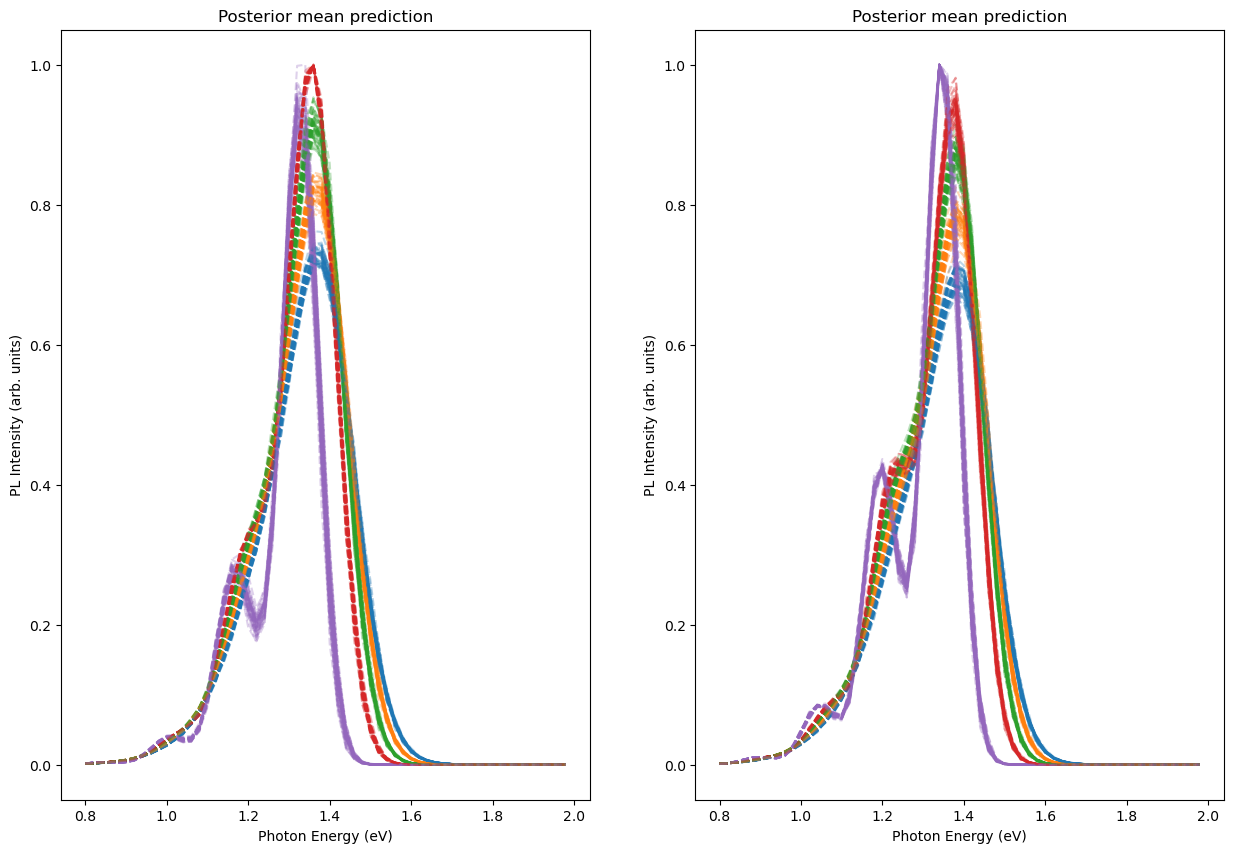

In [21]:
import matplotlib.pyplot as plt 
def generate_data_new(temperature_list, hws,sigma,Temp_std_err,hws_std_err,relative_intensity_std_error,number_free_parameters,true_parameters=None,**kwargs):
    if true_parameters is None:
        E_true = 1.5
        sigma_true = 0.02
        LI_true = 0.09
        L0_true = 0.1
        H0_true = 0.15
        true_parameters = [E_true, sigma_true, LI_true, L0_true, H0_true]
    else:
        E_true, sigma_true, LI_true, L0_true, H0_true = true_parameters
    # error in the temperature of the sample
    temperature_list = temperature_list+np.random.normal(0, Temp_std_err, len(temperature_list))
    # error in the detection wavelength
    hws = hws+np.random.normal(0, hws_std_err, len(hws))
    truemodel_pl = PLPYMCModel.pl_trial(
        [E_true, sigma_true, LI_true, L0_true, H0_true], temperature_list, hws
    ) 
    # relative intensity error
    relative_intensity_model = np.max(truemodel_pl, axis=0)/max(truemodel_pl.reshape(-1, 1))
    relative_intensity_model_error = relative_intensity_model + np.random.normal(0, relative_intensity_std_error, len(relative_intensity_model))
    relative_intensity_model_error= relative_intensity_model_error/np.max(relative_intensity_model_error)
    truemodel_pl=truemodel_pl * relative_intensity_model_error / relative_intensity_model
    relative_intensity_model = np.max(truemodel_pl, axis=0)/max(truemodel_pl.reshape(-1, 1))
    # uniform error accross the spectrum
    truemodel_pl = truemodel_pl+np.random.normal(0, sigma, size=(len(hws), len(temperature_list)))

    return truemodel_pl, true_parameters
def plot_generated_data(true_parameters, temperature_list, hws, save_folder, model_config, savefig=True,fig=None,ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for x in range(50):
        truemodel_pl, true_parameters = generate_data_new(temperature_list, hws, **model_config,true_parameters=true_parameters)
        data_true_plot = truemodel_pl.reshape(len(hws), -1)
        
        for i in range(len(temperature_list)):
            ax.plot(
                hws,
                data_true_plot[:, i]/max(data_true_plot.reshape(-1, 1)),
                label="true" + str(temperature_list[i]) + " K",
                linestyle="--",
                color="C" + str(i),
                alpha=0.3,
            )
        ax.set_xlabel("Photon Energy (eV)")
        ax.set_ylabel("PL Intensity (arb. units)")
        ax.set_title("Posterior mean prediction")
    if savefig:
        fig.savefig(save_folder + "/generated_data.png")
    return fig, ax
fig, ax = plt.subplots(1,2,figsize=(15,10))
true_parameters=[1.5,0.02,0.07,0.12,0.16]

plot_generated_data(true_parameters, temperature_list, hws, "", savefig=False, model_config=model_config,fig=fig,ax=ax[0])
true_parameters=[1.5,0.02,0.09,0.1,0.15]

plot_generated_data(true_parameters, temperature_list, hws, "", savefig=False, model_config=model_config,fig=fig,ax=ax[1])

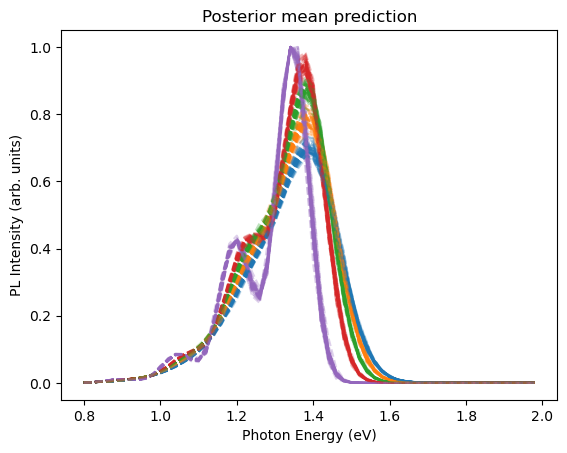

In [14]:
true_parameters=[1.5,0.02,0.09,0.1,0.15]
truemodel_pl, true_parameters = generate_data_new(temperature_list, hws, **model_config,true_parameters=true_parameters)

test_FIT_NEW.plot_generated_data(truemodel_pl, temperature_list, hws, "", savefig=False, model_config=model_config)

{'number_free_parameters': 5, 'E': {'min': 1.0, 'max': 2.0}, 'sigma_E': {'min': 0.001, 'max': 0.03}, 'LI': {'mu': 0.12, 'sigma': 0.01, 'lower': 0.05, 'upper': 0.2}, 'L0': {'mu': 0.12, 'sigma': 0.01, 'lower': 0.05, 'upper': 0.2}, 'H0': {'mu': 0.12, 'sigma': 0.01, 'lower': 0.05, 'upper': 0.2}, 'Temp_std_err': 0.1, 'hws_std_err': 0.002, 'relative_intensity_std_error': 0.05, 'sigma': 0.02}


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
E,1.512,0.031,1.460,1.576,0.008,0.006,20.0,40.0,1.17
sigma_E,0.021,0.006,0.012,0.030,0.002,0.002,9.0,11.0,1.41
LI,0.091,0.021,0.052,0.117,0.009,0.007,5.0,11.0,2.01
L0,0.103,0.043,0.050,0.182,0.018,0.013,6.0,28.0,1.87
H0,0.153,0.017,0.134,0.192,0.008,0.006,5.0,12.0,2.01


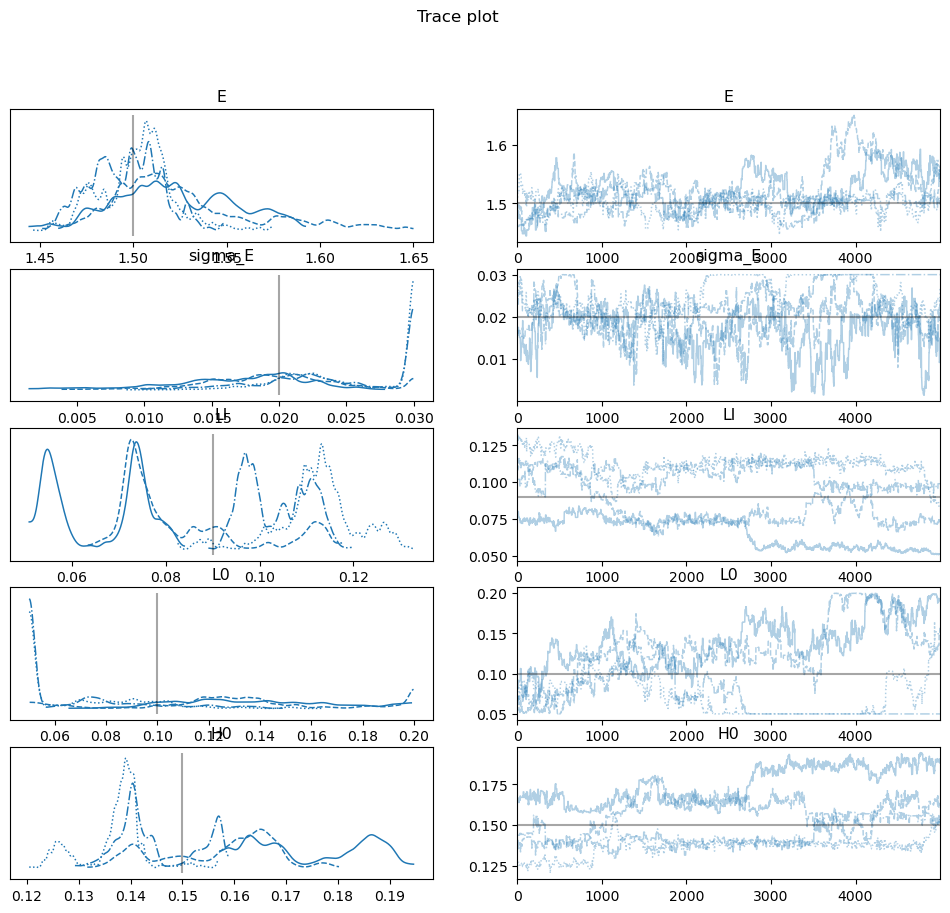

In [12]:
from pl_temp_fit import PLPYMCModel
E_true = 1.5
sigma_true = 0.02
LI_true = 0.09
L0_true = 0.1
H0_true = 0.15
true_parameters = [E_true, sigma_true, LI_true, L0_true, H0_true]
model = PLPYMCModel.PLPYMCModel()
model_2 = model.load(f'{f}/model.nc')
model_2.plot_trace(true_parameters, save_folder="", savefig=False)
print(model_2.model_config)
df_summary = arviz.summary(model_2.idata)

In [67]:
df_summary = arviz.summary(model_2.idata)

array([[<Axes: title={'center': 'E'}>, <Axes: title={'center': 'E'}>],
       [<Axes: title={'center': 'sigma_E'}>,
        <Axes: title={'center': 'sigma_E'}>],
       [<Axes: title={'center': 'LI'}>, <Axes: title={'center': 'LI'}>],
       [<Axes: title={'center': 'L0'}>, <Axes: title={'center': 'L0'}>],
       [<Axes: title={'center': 'H0'}>, <Axes: title={'center': 'H0'}>]],
      dtype=object)

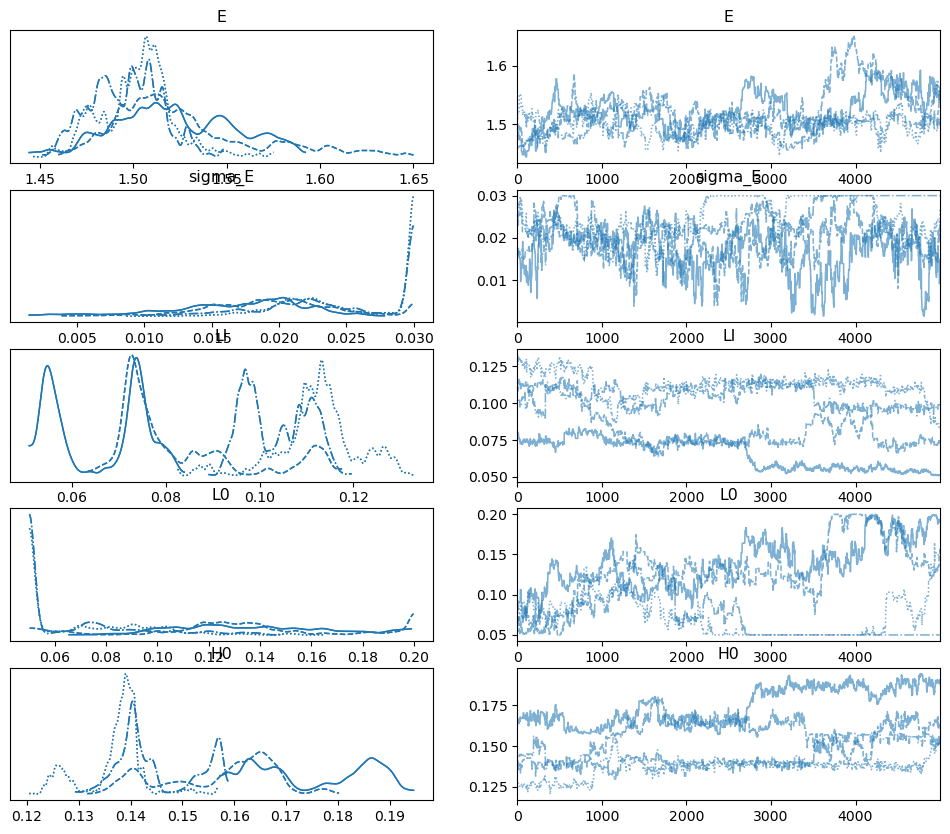

In [75]:
concat_data = arviz.concat([model_2.idata, model_2.idata], dim='chain')
arviz.summary(concat_data)  
arviz.plot_trace(concat_data, var_names=['E', 'sigma_E', 'LI', 'L0', 'H0'], compact=True)

In [79]:
model_2.idata

Inference data with groups:
	> posterior
	> sample_stats
	> prior

array([[<Axes: title={'center': 'E'}>, <Axes: title={'center': 'E'}>],
       [<Axes: title={'center': 'sigma_E'}>,
        <Axes: title={'center': 'sigma_E'}>],
       [<Axes: title={'center': 'LI'}>, <Axes: title={'center': 'LI'}>],
       [<Axes: title={'center': 'L0'}>, <Axes: title={'center': 'L0'}>],
       [<Axes: title={'center': 'H0'}>, <Axes: title={'center': 'H0'}>]],
      dtype=object)

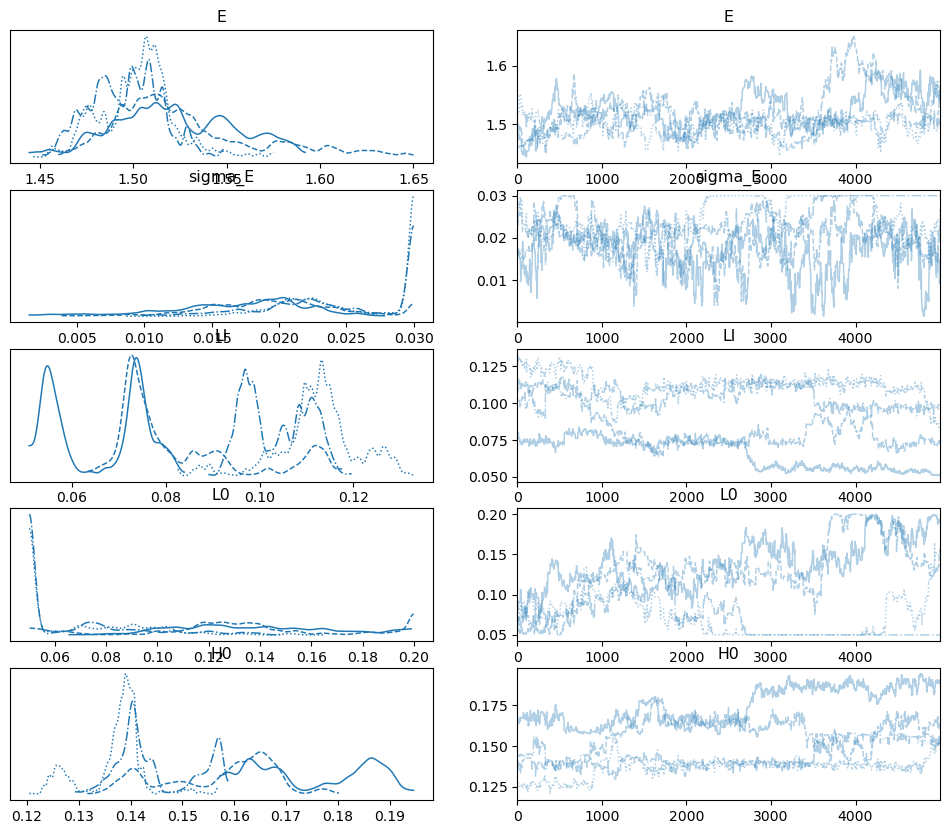

In [76]:
arviz.summary(model_2.idata)
arviz.plot_trace(model_2.idata, var_names=['E', 'sigma_E', 'LI', 'L0', 'H0'], compact=True)